In [67]:
# import des packages nécessaires à l'exécution du code 

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
import numpy as np

## Modèles naïfs

In [68]:
df_model = pd.read_csv('data_cleaned.csv')

In [69]:
X = df_model.drop(['price','date'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

regression = linear_model.LinearRegression()


regression.fit(X_train, y_train)
regression.predict(X_test)
regression.score(X_test, y_test)

0.88581251325

In [70]:
X = df_model.drop(['price','date'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

knn = KNeighborsRegressor()


knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test, y_test)

0.35799355052515125

## Modèle 1 - Régression linéaire avec valeurs extrêmes, avec des variables qu'on ne peut pas demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. On prend ici en compte les zipcode et non latitude/longitude. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- m2_living15
- price_m2
- view
- m2_basement
- waterfront
- floors
- m2_lot
- m2_lot15
- condition
- zipcode

Preprocessing : 
- MinMaxScaler
- Onehotencoding

Problème :
- variables que l'utilisateur ne connait pas

In [71]:
df_model = pd.read_csv('data_cleaned.csv')


In [72]:
df_model.dtypes

date             object
id                int64
price           float64
bedrooms          int64
bathrooms       float64
m2_living       float64
m2_lot          float64
floors          float64
waterfront        int64
view              int64
condition         int64
grade             int64
m2_above        float64
m2_basement     float64
yr_built          int64
yr_renovated      int64
zipcode           int64
lat             float64
long            float64
m2_living15     float64
m2_lot15        float64
price_m2        float64
dtype: object

In [73]:
df_model.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2516.239882
3,2014-12-09,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,3317.043210
4,2015-02-18,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3267.617069


In [74]:
X = df_model.drop(['date','price','id'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [75]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [76]:
predictions = trained_pipe.predict(X_test)

In [77]:
trained_pipe.score(X_test, y_test)

0.8998676630605593

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

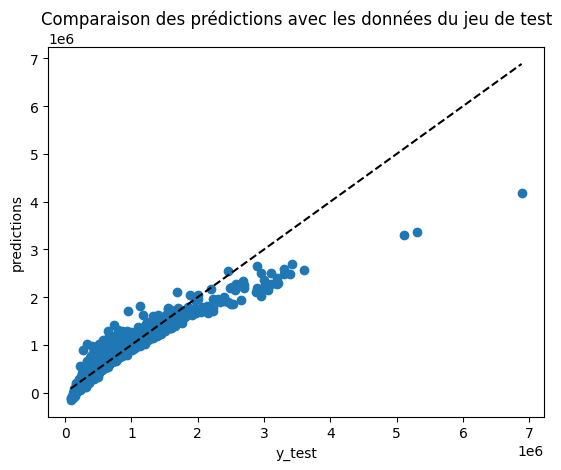

In [78]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')


In [79]:
predictions

array([275953.45303011, 335786.36569874, 544806.13485313, ...,
       355212.3743482 , 683610.98213834, 530353.34794226])

In [80]:
y_test

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64

## Modèle 2 - Régression linéaire sans valeur extrême, avec variables qu'on ne peut pas demander à l'utilisateur

Ce modèle sera celui qui ne contient pas les valeurs extrêmes : plus précis mais plus restrictif. On prend ici en compte les zipcode et non latitude/longitude. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- m2_living15
- price_m2
- view
- m2_basement
- waterfront
- floors
- m2_lot
- m2_lot15
- condition

In [81]:
df_model_filtre = pd.read_csv('data_cleaned2.csv')


In [82]:
df_model_filtre.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.625540,524.901950,1.0,0,0,...,109.625540,0.0000,1955,0,98178,47.5112,-122.257,124.490020,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.760710,672.803526,2.0,0,0,...,201.599510,37.1612,1951,1991,98125,47.7210,-122.319,157.006070,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.535310,929.030000,1.0,0,0,...,71.535310,0.0000,1933,0,98028,47.7379,-122.233,252.696160,748.983986,2516.239882
3,2015-02-18,1954400510,510000.0,3,2.00,156.077040,750.656240,1.0,0,0,...,156.077040,0.0000,1987,0,98074,47.6168,-122.045,167.225400,697.051209,3267.617069
4,2014-06-27,1321400060,257500.0,3,2.25,159.328645,633.505557,2.0,0,0,...,159.328645,0.0000,1995,0,98003,47.3097,-122.327,207.916914,633.505557,1616.156342


In [83]:
X = df_model_filtre.drop(['date','price','id'], axis=1)
y = df_model_filtre['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [84]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [85]:
predictions = trained_pipe.predict(X_test)

In [86]:
trained_pipe.score(X_test, y_test)

0.920456369131554

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

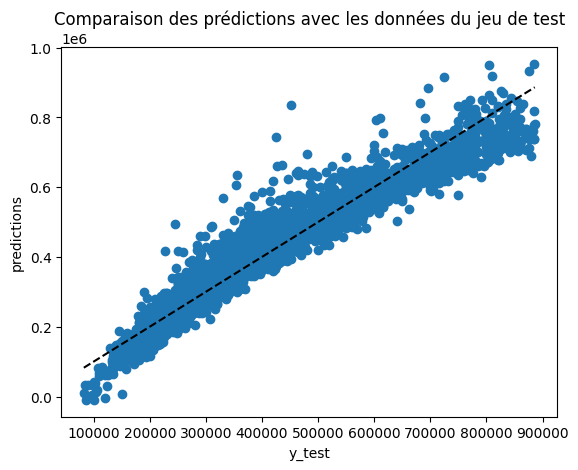

In [87]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')


In [88]:
predictions

array([185298.85394761, 753190.92599773, 317749.02710039, ...,
       492660.24005899, 237086.36356666, 264586.3044654 ])

In [89]:
y_test

9127     209000.0
4042     689000.0
11468    260000.0
1388     340000.0
7151     306000.0
           ...   
14972    575000.0
16406    490000.0
14109    455000.0
4446     243400.0
15867    244950.0
Name: price, Length: 3590, dtype: float64

## Modèle 3 - KNN avec valeurs extrêmes, avec valeurs qu'on ne peut pas demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- m2_living15
- price_m2
- view
- m2_basement
- waterfront
- floors
- m2_lot
- m2_lot15
- condition

In [90]:
df_model = pd.read_csv('data_cleaned.csv')


In [91]:
X = df_model.drop(['date','price','id','price_m2'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)
knn = grid.best_estimator_

pipe = Pipeline([
    ('prep',preprocessor),
    ('knn',knn)
                
])

print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9}


In [92]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
predictions = trained_pipe.predict(X_test)

In [94]:
trained_pipe.score(X_test, y_test)

0.7845614122513722

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

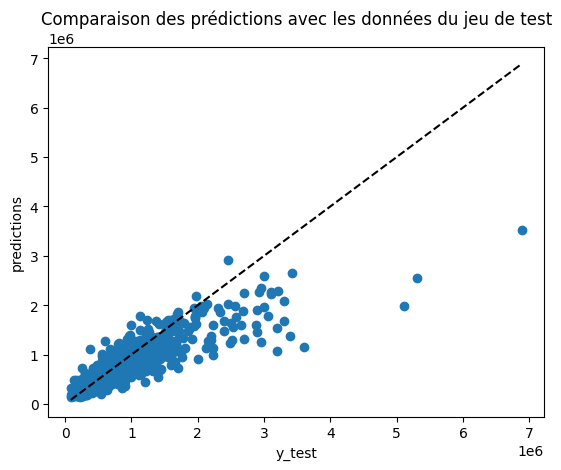

In [95]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')


In [96]:
predictions

array([287155.55555556, 397427.77777778, 538011.11111111, ...,
       387444.44444444, 697388.88888889, 389970.        ])

In [97]:
y_test

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64

## Modèle 4 - KNN sans valeur extrême, avec des variables qu'on ne peut pas demander aux utilisateurs

Ce modèle sera celui qui ne contient pas les valeurs extrêmes : plus précis mais plus restrictif. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- m2_living15
- price_m2
- view
- m2_basement
- waterfront
- floors
- m2_lot
- m2_lot15
- condition

Préprocessing : 
- MinMaxScaler 
- Onehotencoding
- GridSearchCv

In [98]:
df_model_filtre = pd.read_csv('data_cleaned2.csv')


In [99]:
df_model_filtre.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.625540,524.901950,1.0,0,0,...,109.625540,0.0000,1955,0,98178,47.5112,-122.257,124.490020,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.760710,672.803526,2.0,0,0,...,201.599510,37.1612,1951,1991,98125,47.7210,-122.319,157.006070,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.535310,929.030000,1.0,0,0,...,71.535310,0.0000,1933,0,98028,47.7379,-122.233,252.696160,748.983986,2516.239882
3,2015-02-18,1954400510,510000.0,3,2.00,156.077040,750.656240,1.0,0,0,...,156.077040,0.0000,1987,0,98074,47.6168,-122.045,167.225400,697.051209,3267.617069
4,2014-06-27,1321400060,257500.0,3,2.25,159.328645,633.505557,2.0,0,0,...,159.328645,0.0000,1995,0,98003,47.3097,-122.327,207.916914,633.505557,1616.156342


In [100]:
X = df_model_filtre.drop(['date','price','id'], axis=1)
y = df_model_filtre['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)
knn = grid.best_estimator_

pipe = Pipeline([
    ('prep',preprocessor),
    ('knn',knn)
                
])

In [101]:
print(grid.best_estimator_)

KNeighborsRegressor(metric='manhattan', n_neighbors=6)


In [102]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [103]:
predictions = trained_pipe.predict(X_test)

In [104]:
trained_pipe.score(X_test, y_test)

0.8473360247042774

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

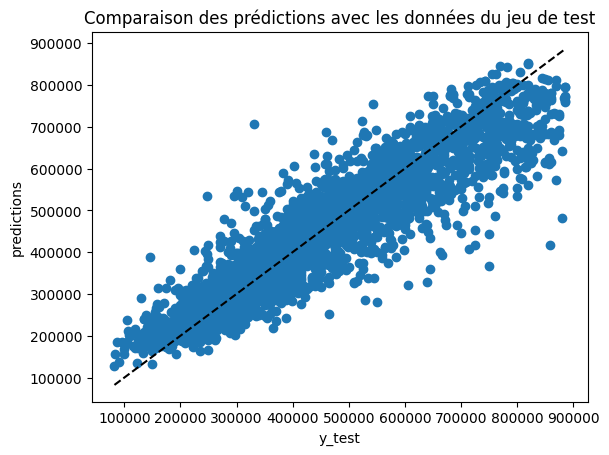

In [105]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')


In [106]:
predictions

array([217233.33333333, 733416.5       , 316816.66666667, ...,
       438050.        , 226733.33333333, 275983.33333333])

In [107]:
y_test

9127     209000.0
4042     689000.0
11468    260000.0
1388     340000.0
7151     306000.0
           ...   
14972    575000.0
16406    490000.0
14109    455000.0
4446     243400.0
15867    244950.0
Name: price, Length: 3590, dtype: float64

## Modèle 5 - Régression linéaire, avec valeurs extrêmes, uniquement variables qu'on peut demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. Les features sont : 
- les différentes surfaces (m2_living, m2_above,m2_basement,m2_lot)
- le nombre de pièces (bedrooms,bathrooms) et d'étages (floors)
- les années de construction, rénovation
- les notes obtenues sur différents sujets (grade,condition,view)
- localisation (zipcode, lat, long, waterfront)

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder

In [108]:
df_model = pd.read_csv('data_cleaned.csv')

In [109]:
df_model.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2516.239882
3,2014-12-09,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,3317.043210
4,2015-02-18,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3267.617069


In [110]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.drop(['view'],axis=1).select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode','view']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [111]:
X_train.head()

,m2_living,grade,view,m2_above,bathrooms,zipcode,m2_basement,bedrooms,waterfront,floors,yr_renovated,m2_lot,yr_built,condition
20866,153.28995,8,0,153.28995,2.50,98133,0.0000,3,0,3.0,0,204.479503,2007,3
978,118.91584,7,0,118.91584,1.00,98003,0.0000,3,0,1.0,0,809.370936,1956,4
14161,152.36092,7,0,152.36092,2.00,98042,0.0000,3,0,1.0,0,524.901950,2003,3
18477,132.85129,8,0,132.85129,1.75,98024,0.0000,3,0,2.0,0,4982.202084,1985,3
3478,163.50928,7,0,89.18688,2.00,98199,74.3224,3,0,1.0,0,464.515000,1920,5


In [112]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [113]:
predictions = trained_pipe.predict(X_test)

In [114]:
trained_pipe.score(X_test, y_test)

0.8815547754236779

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

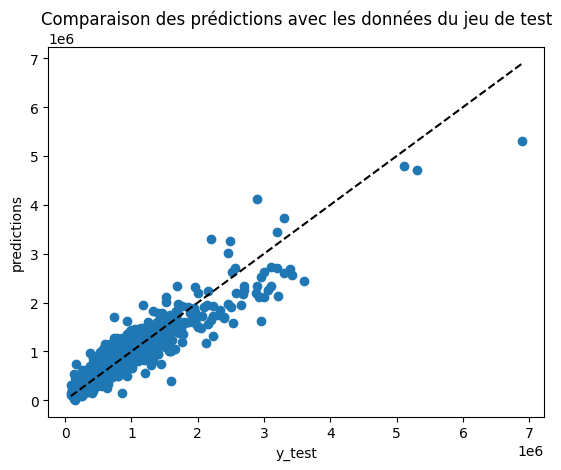

In [115]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')



In [116]:
predictions

array([282256., 313976., 505784., ..., 373712., 676864., 477688.])

In [117]:
y_test

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64

## Modèle 6 - Régression linéaire, sans valeurs extrêmes, uniquement variables qu'on peut demander à l'utilisateur

Ce modèle sera celui qui ne contient pas les valeurs extrêmes : plus précis mais plus restrictif. On prend ici en compte les zipcode et non latitude/longitude. Les features sont : 
- les différentes surfaces (m2_living, m2_above,m2_basement,m2_lot)
- le nombre de pièces (bedrooms,bathrooms) et d'étages (floors)
- les années de construction, rénovation
- les notes obtenues sur différents sujets (grade,condition,view)
- localisation (zipcode, waterfront)

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder

In [118]:
df_model_filtre = pd.read_csv('data_cleaned2.csv')

In [119]:
df_model_filtre.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.625540,524.901950,1.0,0,0,...,109.625540,0.0000,1955,0,98178,47.5112,-122.257,124.490020,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.760710,672.803526,2.0,0,0,...,201.599510,37.1612,1951,1991,98125,47.7210,-122.319,157.006070,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.535310,929.030000,1.0,0,0,...,71.535310,0.0000,1933,0,98028,47.7379,-122.233,252.696160,748.983986,2516.239882
3,2015-02-18,1954400510,510000.0,3,2.00,156.077040,750.656240,1.0,0,0,...,156.077040,0.0000,1987,0,98074,47.6168,-122.045,167.225400,697.051209,3267.617069
4,2014-06-27,1321400060,257500.0,3,2.25,159.328645,633.505557,2.0,0,0,...,159.328645,0.0000,1995,0,98003,47.3097,-122.327,207.916914,633.505557,1616.156342


In [120]:
X = df_model_filtre[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model_filtre['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [121]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [122]:
predictions = trained_pipe.predict(X_test)

In [123]:
trained_pipe.score(X_test, y_test)

0.8287499492739231

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

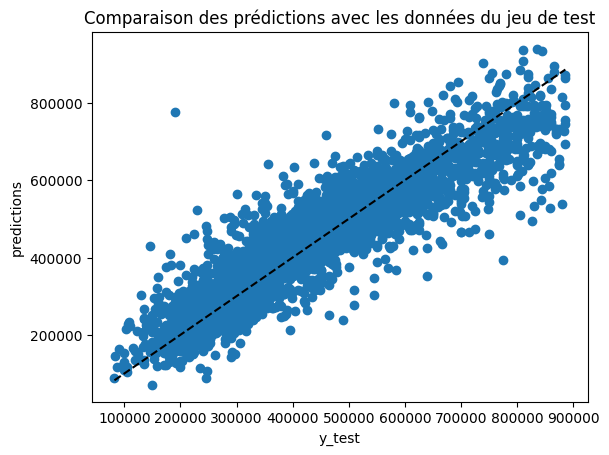

In [124]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')


## Modèle 7 - KNN, avec valeurs extrêmes, uniquement variables qu'on peut demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. On prend ici en compte les zipcode et non latitude/longitude. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- view
- m2_basement
- waterfront
- floors
- m2_lot
- condition
- zipcode

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder

In [125]:
df_model = pd.read_csv('data_cleaned.csv')


In [126]:
df_model.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2516.239882
3,2014-12-09,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,3317.043210
4,2015-02-18,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3267.617069


In [127]:
X = df_model[['lat','long','m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)
knn = grid.best_estimator_

knn = KNeighborsRegressor()

pipe = Pipeline([
    ('prep',preprocessor),
    ('knn',knn)
                
])

print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 7}


In [128]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [129]:
predictions = trained_pipe.predict(X_test)

In [130]:
trained_pipe.score(X_test, y_test)

0.7487576780441314

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

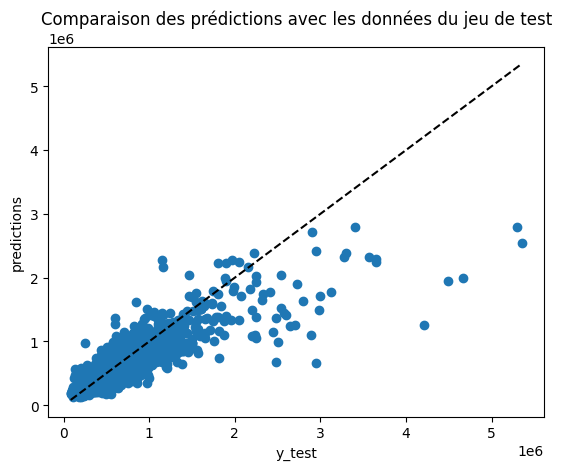

In [131]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')


## Modèle 8 - Régression linéaire Lasso, avec valeurs extrêmes, sans valeurs qu'on ne peut pas demander aux utilisateurs

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. Les features sont : 
- les différentes surfaces (m2_living, m2_above,m2_basement,m2_lot)
- le nombre de pièces (bedrooms,bathrooms) et d'étages (floors)
- les années de construction, rénovation
- les notes obtenues sur différents sujets (grade,condition,view)
- localisation (zipcode, lat, long, waterfront)

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- RobustScaler
- PolynomialFeature
- OneHotEncoder
- GridSearchCV pour choisir le meilleur hyperparamètre de Lasso (alpha)

In [132]:
df_model = pd.read_csv('data_cleaned.csv')

In [146]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.drop(['view'],axis=1).select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode','view']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('min_max', RobustScaler())
])

catagorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'alpha':[0.1,1,10]} 

grid = GridSearchCV(Lasso(), param_grid, cv=5)

grid.fit(X_train, y_train)
regression = grid.best_estimator_


pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.519e+13, tolerance: 1.843e+11
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.437e+13, tolerance: 1.790e+11
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

In [145]:

trained_pipe = pipe.fit(X_train, y_train)
predictions = trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.578e+14, tolerance: 2.255e+11
  model = cd_fast.enet_coordinate_descent(


0.879422915503004

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

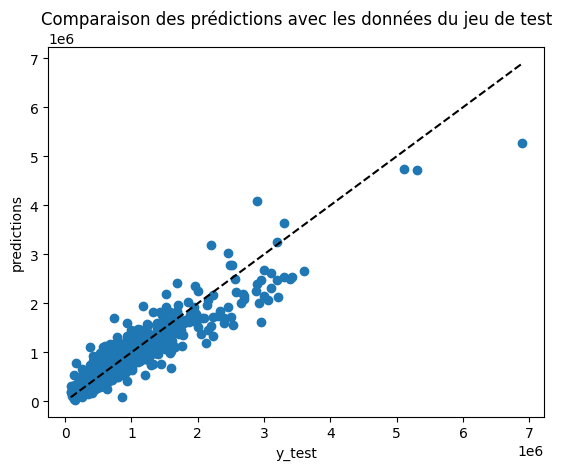

In [135]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')

## Modèle 9 - Régression linéaire Ridge, avec valeurs extrêmes, sans variables qu'on ne peut pas demander aux utilisateurs

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. Les features sont : 
- les différentes surfaces (m2_living, m2_above,m2_basement,m2_lot)
- le nombre de pièces (bedrooms,bathrooms) et d'étages (floors)
- les années de construction, rénovation
- les notes obtenues sur différents sujets (grade,condition,view)
- localisation (zipcode, lat, long, waterfront)

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder
- GridSearchCV pour choisir le meilleur hyperparamètre de Ridge (alpha)

In [136]:
df_model = pd.read_csv('data_cleaned.csv')

In [137]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price'] 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.drop(['view'],axis=1).select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode','view']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'alpha':[0.1,1,10]} 

grid = GridSearchCV(Ridge(), param_grid, cv=5)

grid.fit(X_train, y_train)
regression = grid.best_estimator_


pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [138]:

trained_pipe = pipe.fit(X_train, y_train)
predictions = trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.8758493166895527

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

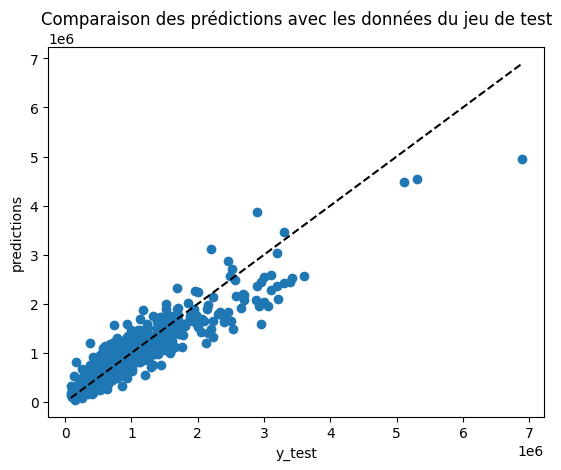

In [139]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')

## Modèle 10 - Régression linéaire ElasticNet, avec les valeurs extrêmes, sans variables qu'on ne peut pas demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. Les features sont : 
- les différentes surfaces (m2_living, m2_above,m2_basement,m2_lot)
- le nombre de pièces (bedrooms,bathrooms) et d'étages (floors)
- les années de construction, rénovation
- les notes obtenues sur différents sujets (grade,condition,view)
- localisation (zipcode, lat, long, waterfront)

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder
- GridSearchCV pour choisir les meilleurs hyperparamètres de ElasticNet (alpha et l1_ratio)

In [140]:
df_model = pd.read_csv('data_cleaned.csv')

In [141]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.drop(['view'],axis=1).select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode','view']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'alpha':[0.1,1,10],
             'l1_ratio':[0.25,0.5,0.75]} 

grid = GridSearchCV(ElasticNet(), param_grid, cv=5)

grid.fit(X_train, y_train)
regression = grid.best_estimator_


pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.481e+14, tolerance: 1.843e+11
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.390e+14, tolerance: 1.790e+11
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

In [142]:

trained_pipe = pipe.fit(X_train, y_train)
predictions = trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.7249290388170533

Text(0.5, 1.0, 'Comparaison des prédictions avec les données du jeu de test')

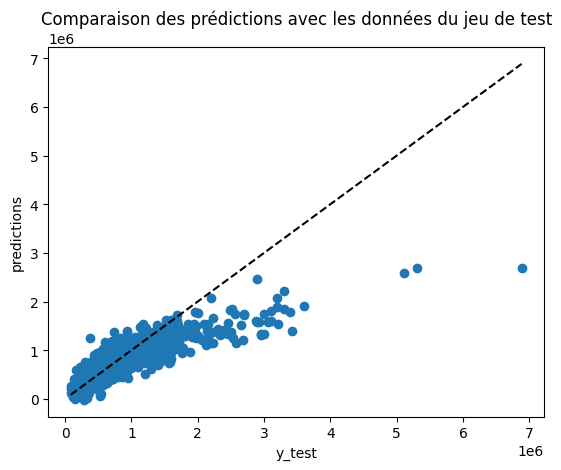

In [143]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Comparaison des prédictions avec les données du jeu de test')